In [1]:
!pip install google-play-scraper

  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.1-py3-none-any.whl size=24177 sha256=2b41d0f6a8152e34dcd361e5fa21ac0a99c69794e4159b986c8b97a871870ca3
  Stored in directory: c:\users\asus 8i5-8-512-4gtx\appdata\local\pip\cache\wheels\cf\ff\d2\e9c42c55a1fd134c61e494439fbf06ab86ed40fe109371af27
Successfully built google-play-scraper


In [4]:
!pip install -qq -U watermark

In [5]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas             : 1.2.4
matplotlib         : 3.3.4
seaborn            : 0.11.1
google_play_scraper: 1.0.1



In [6]:
import json

import pandas as pd

from tqdm import tqdm #Instantly make your loops show a smart progress meter - 
#just wrap any iterable with tqdm(iterable), and you’re done!

import seaborn as sns
#Seaborn is a library for making statistical graphics in Python. 
#It builds on top of matplotlib and integrates closely with pandas data structures.

import matplotlib.pyplot as plt

from pygments import highlight
#Pygments is a syntax highlighting package written in Python

from pygments.lexers import JsonLexer
# https://pygments.org/docs/quickstart/

from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'
#Use %config InlineBackend.figure_format = 'retina' 
#after %matplotlib inline to render higher resolution images.

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [7]:
app_reviews = []
ap="nic.goi.aarogyasetu"
for score in tqdm(list(range(1, 6))):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
        rvs, _ = reviews(
            ap,
            lang='en',
            country='in',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
          )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap
        app_reviews.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.61s/it]


In [8]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [9]:
print_json(app_reviews[0])

{
  "appId": "nic.goi.aarogyasetu",
  "at": "2021-09-09 13:10:31",
  "content": "No use of this app. If anyone rich and ready to pay, have lots of vaccination centers available. No free vaccination centers. Better to contact PHC directly. My family members got vaccine like that. Even now I am trying for 6 months for free vaccine. Even Registration number not necessary for vaccination, my Family members used these registration numbers. And also otp verification is the biggest head ache. OTP in every checking for a registered user is not fair.",
  "repliedAt": "2021-09-09 14:30:15",
  "replyContent": "Dear Sir/Mam,\n\nPlease provide the following details :\n1) Mobile phone make & model\n2) Android Version\n3) Telecom Service provider (like Airtel,Jio e.t.c)\n4) Screenshot of your error message\n5) Is your mobile phone rooted ?\n6) Country and State\nYou can mail these details to : support.aarogyasetu@gov.in for further assistance.\nRegards\nAarogya Setu",
  "reviewCreatedVersion": "1.4.1

In [10]:
len(app_reviews)

1200

In [11]:
app_reviews_df = pd.DataFrame(app_reviews)

app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFmZsztqZDXwmOYajwPScUTCPeUCMr8MEFAtJq...,Sunilkumar M N,https://play-lh.googleusercontent.com/a-/AOh14...,No use of this app. If anyone rich and ready t...,1,61,1.4.1,2021-09-09 13:10:31,"Dear Sir/Mam,\n\nPlease provide the following ...",2021-09-09 14:30:15,most_relevant,nic.goi.aarogyasetu
1,gp:AOqpTOE1efJyBBPptu5u1QaUUlebLkDzL2HqsT56RCJ...,Ayush kumar Agarwal,https://play-lh.googleusercontent.com/a/AATXAJ...,Worst app ever. I don't know why there is opti...,1,900,1.4.1,2021-08-24 19:27:40,"Dear Sir/Mam,We're not able to understand your...",2021-08-27 19:15:06,most_relevant,nic.goi.aarogyasetu
2,gp:AOqpTOFWUkX2dbP39wYRydFtN9opGgLzKFeSPsMQcDt...,vandana khambadkar,https://play-lh.googleusercontent.com/a/AATXAJ...,🔴Please don't ignore negative reviews. I ignor...,1,1497,1.4.1,2021-08-15 11:51:08,"Dear Sir/Mam,\nPlease send a screen shot of yo...",2021-08-16 15:22:51,most_relevant,nic.goi.aarogyasetu
3,gp:AOqpTOH0cbVqR3CEUsw1fqqHSF3jC_Y-fKzqPaD4xhP...,Shreyash Raj,https://play-lh.googleusercontent.com/a-/AOh14...,I have been using this app since the day it ca...,1,3334,1.4.1,2021-06-19 11:19:20,None,NaT,most_relevant,nic.goi.aarogyasetu
4,gp:AOqpTOGmxuX6aT7MBd1XwWMYM_ixnCuKeAh49MbP-2k...,jewel mariya georgey,https://play-lh.googleusercontent.com/a/AATXAJ...,I installed the app yesterday and after few ho...,1,1276,1.4.1,2021-07-10 16:56:32,"Dear Sir/Mam,\nPlease send a screen shot of yo...",2021-07-10 17:21:57,most_relevant,nic.goi.aarogyasetu


In [12]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


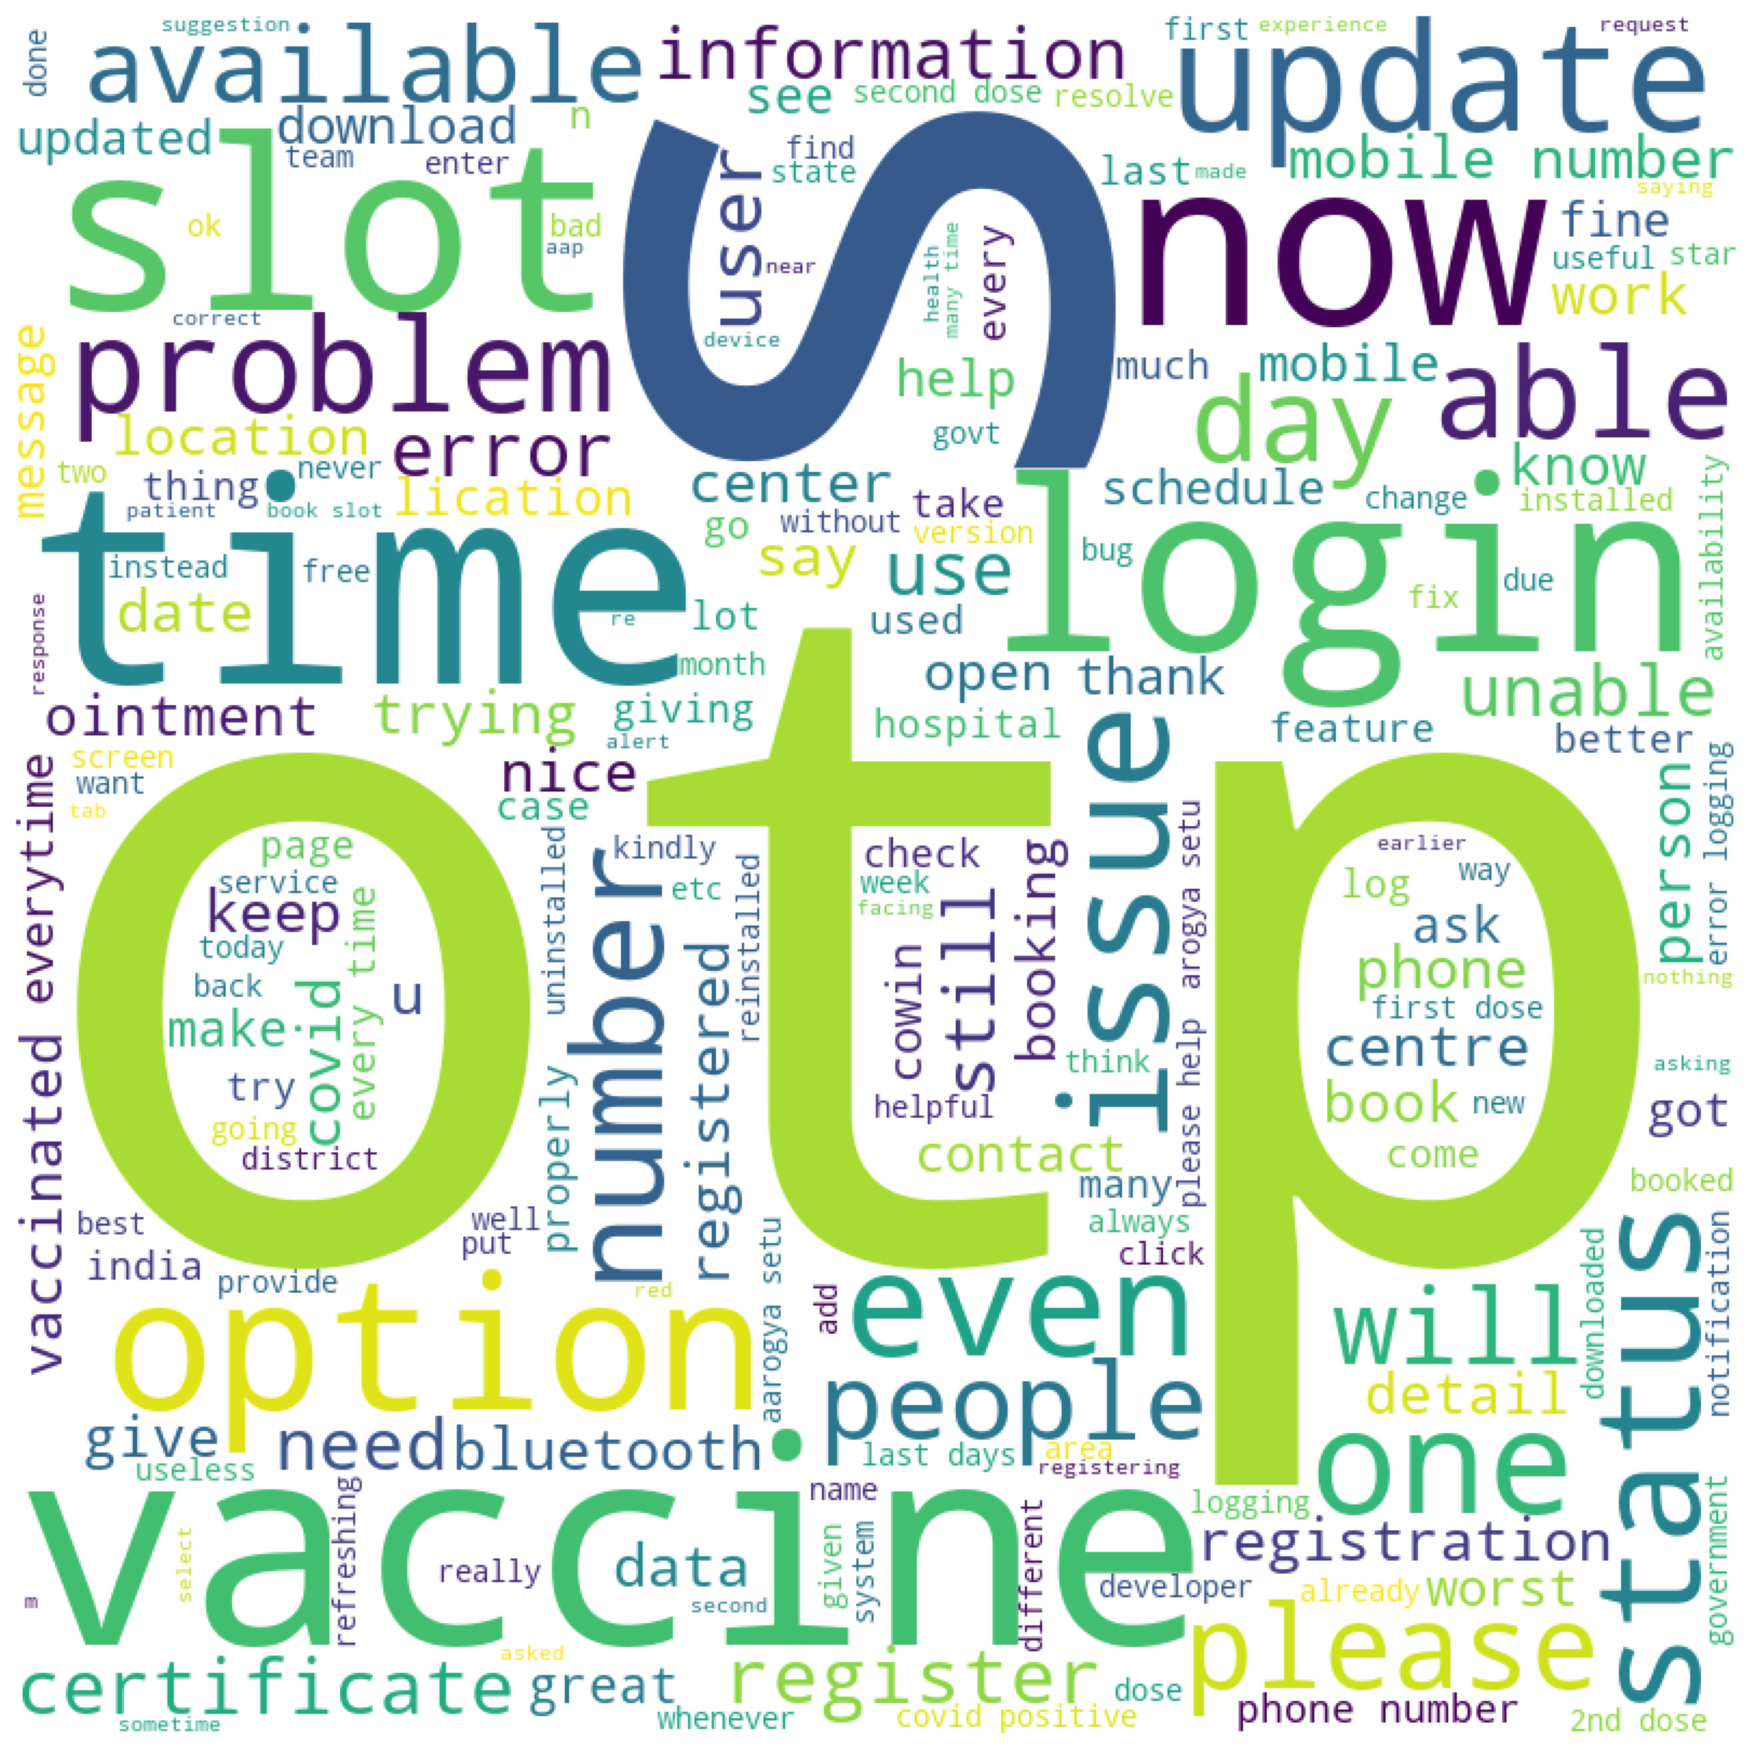

In [18]:
# Python program to generate WordCloud
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in app_reviews_df.content:
      
    # typecaste each val to string
    val = str(val)
    val=val.lower()
    val=val.replace("app",'')
    val=val.replace("vaccination",'')
    val=val.replace("showing",'')
    val=val.replace("using",'')
    val=val.replace("tried",'')
    val=val.replace("getting",'')
    val=val.replace("working",'')
    val=val.replace("show",'')
    val=val.replace("good",'')
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')  
plt.show()